In [1]:
import numpy as np
import pandas as pd

In [2]:
xrange = np.linspace(85.0, 95.0, 10)
yrange = np.linspace(-8.0, -12.0, 5)

In [3]:
data = zip(np.random.choice(xrange, size=300),np.random.choice(yrange, size=300),2.0E9 * np.random.normal(1.0,0.2,300))
data = list(data)
data = np.array(data)

In [4]:
def gaussian(x, sigma, mu):
          return np.exp(-np.power((x - mu), 2.0)/(2*np.power(sigma,2.0)))

In [5]:
for point in data:
    point[2] = point[2] * gaussian(point[0], 1.5, 90) * gaussian(point[1], 1.0, -10.0)

In [74]:
df = pd.DataFrame(data,columns=["freq", "pow", "Nfit"])
len(df)

300

In [7]:
df.groupby(["freq","pow"]).mean().sort_values(by=["Nfit"],ascending=False)

Nfit
freq      pow                
89.444444 -10.0  2.045506e+09
90.555556 -10.0  1.611320e+09
          -11.0  1.260773e+09
          -9.0   1.257142e+09
91.666667 -10.0  1.084572e+09
88.333333 -10.0  1.051470e+09
89.444444 -11.0  1.002110e+09
          -9.0   7.863828e+08
88.333333 -11.0  7.215526e+08
91.666667 -11.0  6.859336e+08
88.333333 -9.0   6.696818e+08
91.666667 -9.0   6.545448e+08
87.222222 -10.0  4.299532e+08
92.777778 -10.0  3.642465e+08
89.444444 -12.0  2.722956e+08
90.555556 -12.0  2.647584e+08
89.444444 -8.0   2.459902e+08
90.555556 -8.0   2.303737e+08
87.222222 -11.0  2.288740e+08
          -9.0   2.208551e+08
92.777778 -11.0  2.172600e+08
          -9.0   2.087978e+08
88.333333 -8.0   1.690956e+08
91.666667 -12.0  1.676406e+08
          -8.0   1.675011e+08
88.333333 -12.0  1.424440e+08
93.888889 -10.0  7.580146e+07
86.111111 -10.0  7.368040e+07
87.222222 -8.0   4.861401e+07
92.777778 -8.0   4.626584e+07
87.222222 -12.0  4.567943e+07
93.888889 -9.0   4.012080e+07
          -11.0  3.991990e+07
86.111111 -9.0   3.914854e+07
92.777778 -12.0  3.798965e+07
86.111111 -11.0  3.653617e+07
          -12.0  9.712584e+06
93.888889 -8.0   9.285374e+06
          -12.0  8.260659e+06
86.111111 -8.0   8.043159e+06
85.000000 -10.0  7.714137e+06
95.000000 -10.0  7.116927e+06
          -11.0  5.185555e+06
85.000000 -9.0   4.555800e+06
          -11.0  4.552092e+06
95.000000 -9.0   4.387935e+06
          -12.0  1.124306e+06
85.000000 -12.0  1.065929e+06
          -8.0   1.052896e+06
95.000000 -8.0   1.038998e+06

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def formater(std, num):
    return f"{std} ({num})"

formater(0.21,11)

'0.21 (11)'

In [23]:
data_stacked = df.groupby(["freq","pow"], as_index=False).mean()
data_stacked["std"] = df.groupby(["freq","pow"], as_index=False).std()["Nfit"]/data_stacked["Nfit"]
data_stacked["size"] = df.groupby(["freq","pow"],as_index=False).size()["size"]
data_stacked["fmt"] = data_stacked["std"].combine(data_stacked["size"], lambda std, num: f"{round(100*std,1)} ({num})")
data_stacked = data_stacked.round(3)

In [26]:
data_avg_pivotted = data_stacked.pivot("pow", "freq", "Nfit")
data_std_pivotted = data_stacked.pivot("pow", "freq", "std")
data_fmt_pivotted = data_stacked.pivot("pow", "freq", "fmt")

In [39]:
data_stacked

,freq,pow,Nfit,std,size,fmt
0,85.000,-12.0,1.065929e+06,0.216,8,21.6 (8)
1,85.000,-11.0,4.552092e+06,0.227,6,22.7 (6)
2,85.000,-10.0,7.714137e+06,0.317,3,31.7 (3)
3,85.000,-9.0,4.555800e+06,0.171,6,17.1 (6)
4,85.000,-8.0,1.052896e+06,0.250,4,25.0 (4)
5,86.111,-12.0,9.712584e+06,0.189,7,18.9 (7)
6,86.111,-11.0,3.653617e+07,0.168,5,16.8 (5)
7,86.111,-10.0,7.368040e+07,0.286,7,28.6 (7)
8,86.111,-9.0,3.914854e+07,0.235,13,23.5 (13)
9,86.111,-8.0,8.043159e+06,0.281,7,28.1 (7)


Text(0.5, 1.0, 'std in % (number of occurences)')

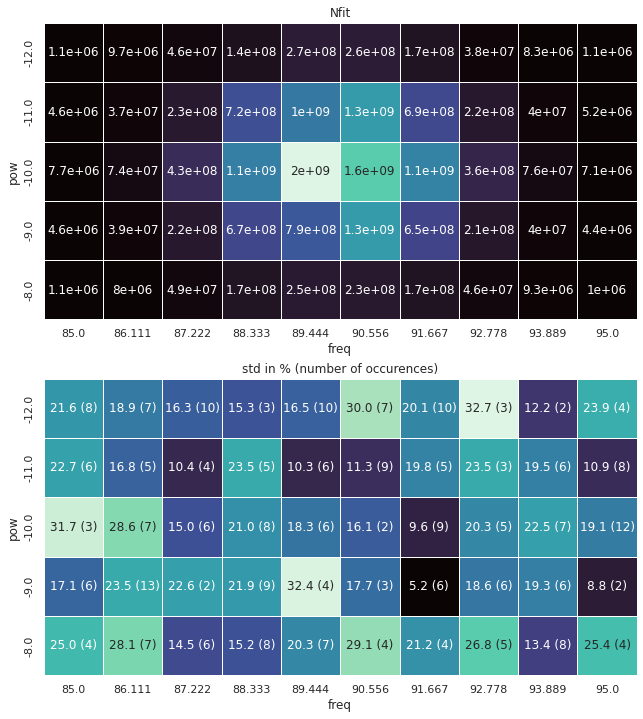

In [46]:
fig, axs = plt.subplots(2, 1)

sns.heatmap(data_avg_pivotted,cmap="mako", annot=True, linewidths=.5,square=True,cbar=False, ax=axs[0])
sns.heatmap(data_std_pivotted,cmap="mako", annot=data_fmt_pivotted, fmt="", linewidths=.5, square=True, cbar=False, ax=axs[1])

axs[0].set_title(data_stacked["Nfit"].name)
axs[1].set_title(data_stacked["std"].name + " in % (number of occurences)")

In [73]:
len(data_stacked.groupby("Nfit"))

50